In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# output.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('output.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'output.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 315 rows and 2 columns


In [7]:
df1.head(5)

,Person No,Predicted Personality
0,1,dependable
1,2,serious
2,3,serious
3,4,serious
4,5,responsible


In [8]:
df1.tail(5)

,Person No,Predicted Personality
310,311,extraverted
311,312,serious
312,313,serious
313,314,extraverted
314,315,extraverted


In [9]:
df1.describe()

,Person No
count,315.000000
mean,158.000000
std,91.076891
min,1.000000
25%,79.500000
50%,158.000000
75%,236.500000
max,315.000000


In [10]:
df1.shape

(315, 2)

In [11]:
df1.isnull().sum()

Person No                0
Predicted Personality    0
dtype: int64

In [12]:
df1.duplicated().sum()

0

In [13]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# test.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('test.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'test.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 531 rows and 8 columns


In [14]:
df2.head(10)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
5,Female,19,6,4,7,5,5,serious
6,Female,24,1,2,7,4,6,extraverted
7,Male,27,4,5,7,4,4,serious
8,Male,20,6,4,5,6,6,serious
9,Male,21,5,4,4,6,4,serious


In [15]:
df2.tail()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
526,Female,20,5,6,2,2,3,extraverted
527,Male,18,6,5,5,5,7,serious
528,Male,19,1,5,4,7,6,serious
529,Female,22,3,3,2,6,4,responsible
530,Female,17,6,6,3,6,5,extraverted


In [16]:
df2.shape

(531, 8)

In [17]:
df2.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,531.000000,531.000000,531.000000,531.000000,531.00000,531.000000
mean,20.122411,4.860640,4.917137,4.838041,4.94162,4.894539
std,2.493404,1.587503,1.709217,1.805689,1.62944,1.456342
min,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.00000,4.000000
50%,19.000000,5.000000,5.000000,5.000000,5.00000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.00000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.00000,8.000000


In [18]:
df2.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

In [19]:
df2.duplicated().sum()

216

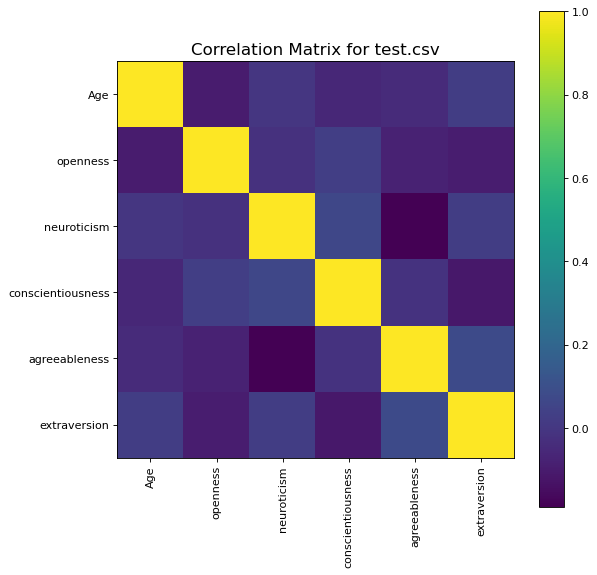

In [20]:
plotCorrelationMatrix(df2, 8)

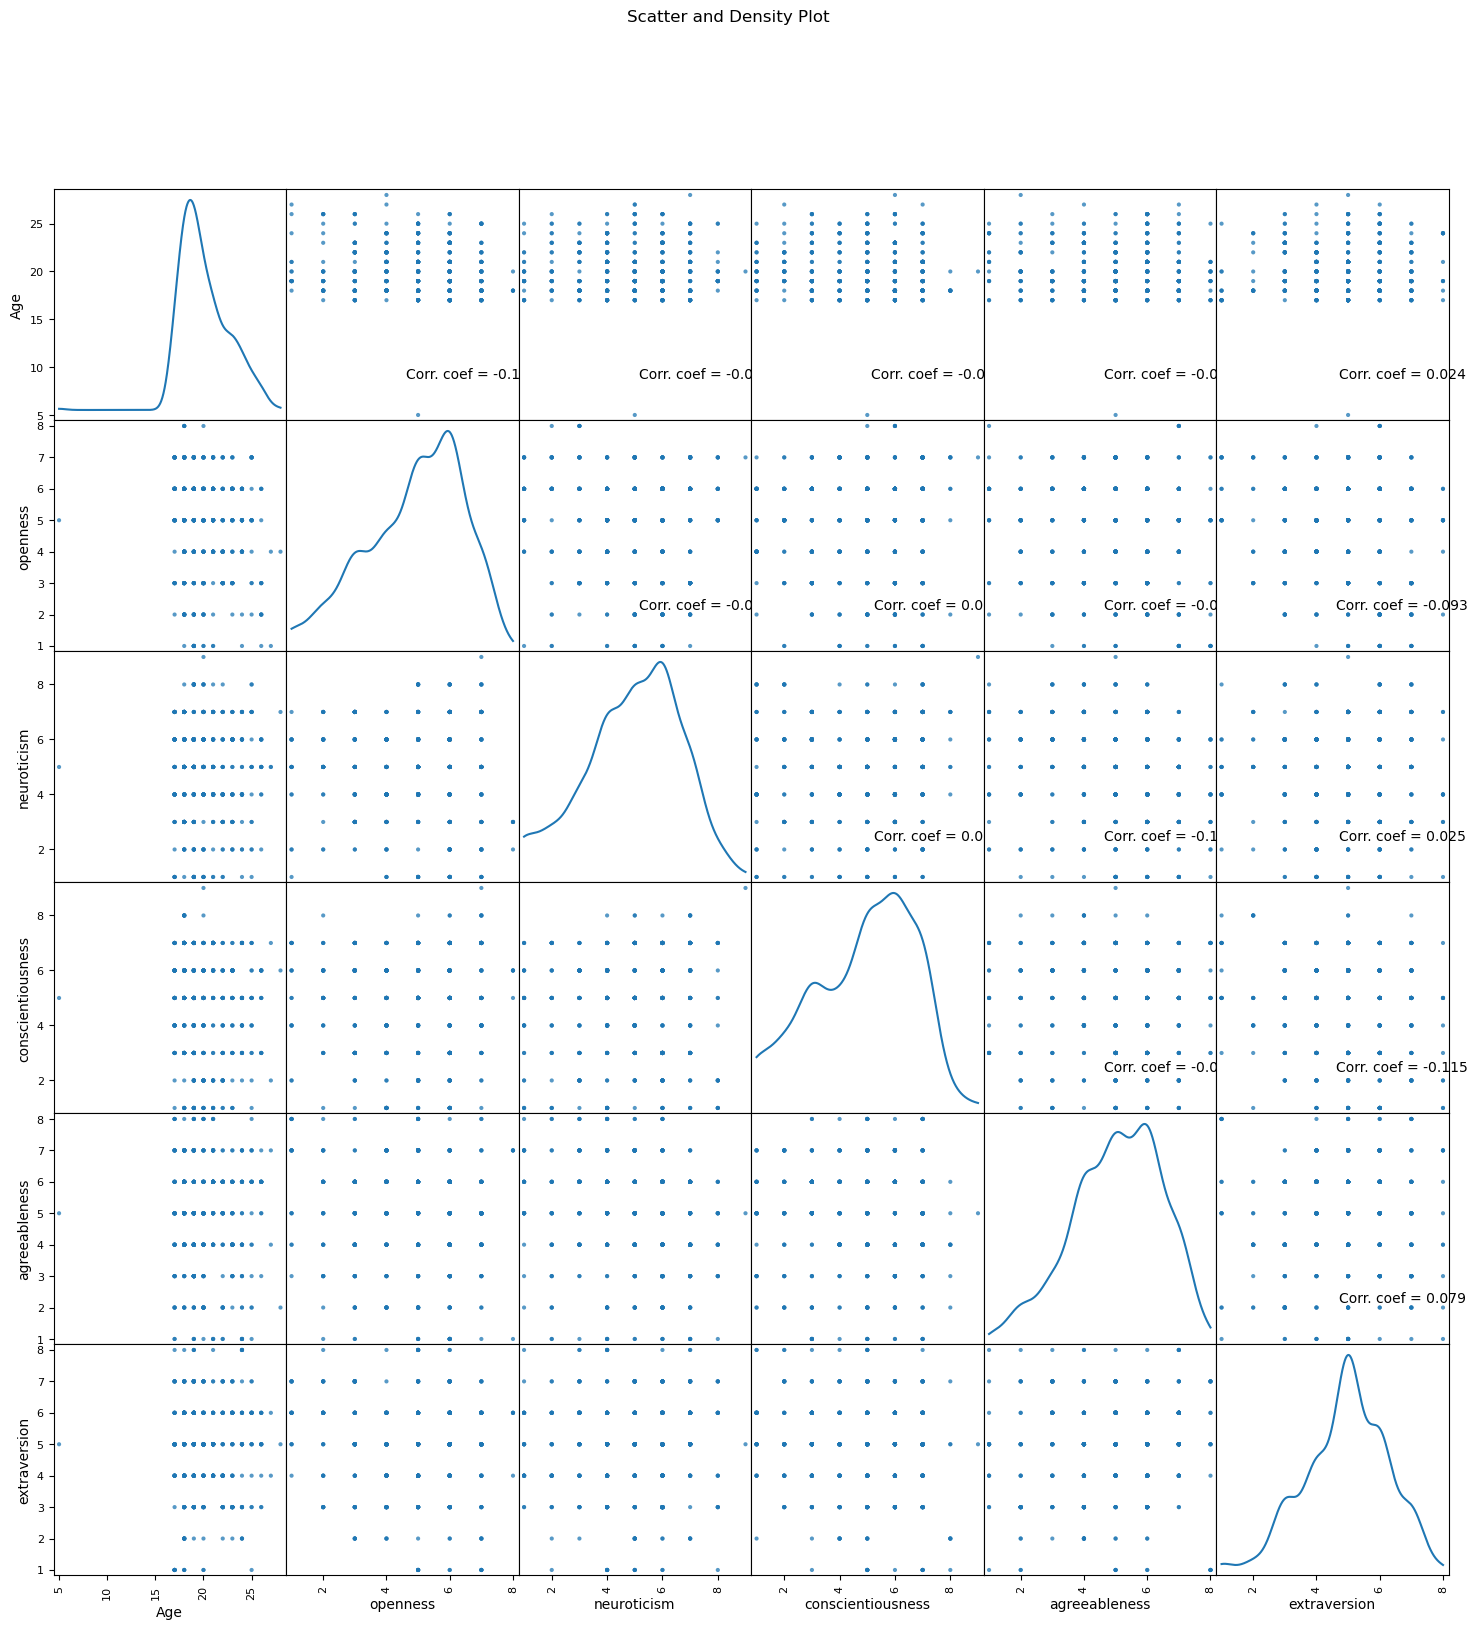

In [21]:
plotScatterMatrix(df2, 18, 10)

In [22]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# train.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df3 = pd.read_csv('train.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'train.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [23]:
df3.head(5)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [24]:
df3.tail()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
995,Female,19,1,1,5,5,6,dependable
996,Female,19,7,6,6,5,7,dependable
997,Female,19,5,7,7,7,4,responsible
998,Male,18,6,7,5,4,1,dependable
999,Female,19,7,4,4,4,6,responsible


In [25]:
df3.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.491000,5.037000,4.616000,4.574000,4.831000,4.280000
std,2.402018,1.527732,1.682074,1.748594,1.690946,1.624265
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,19.000000,5.000000,5.000000,5.000000,5.000000,4.000000
75%,20.000000,6.000000,6.000000,6.000000,6.000000,5.000000
max,28.000000,8.000000,8.000000,8.000000,8.000000,7.000000


In [26]:
df3.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (Class label)    0
dtype: int64

In [27]:
df3.duplicated().sum()

406

In [28]:
df3.drop_duplicates(inplace=True)

In [29]:
df3.duplicated().sum()

0

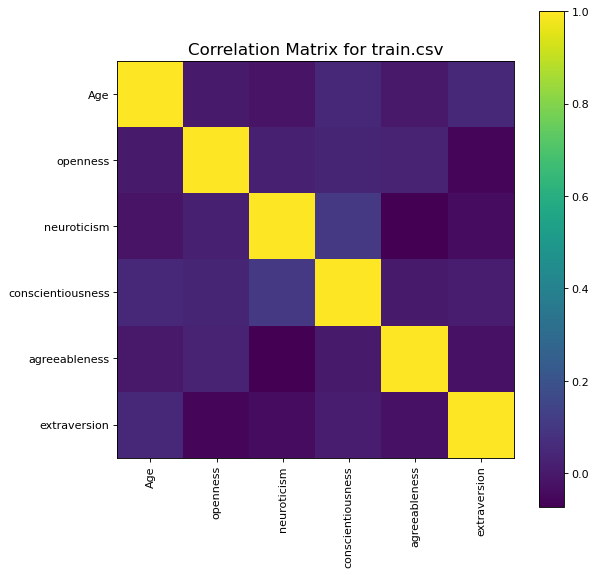

In [30]:
plotCorrelationMatrix(df3, 8)

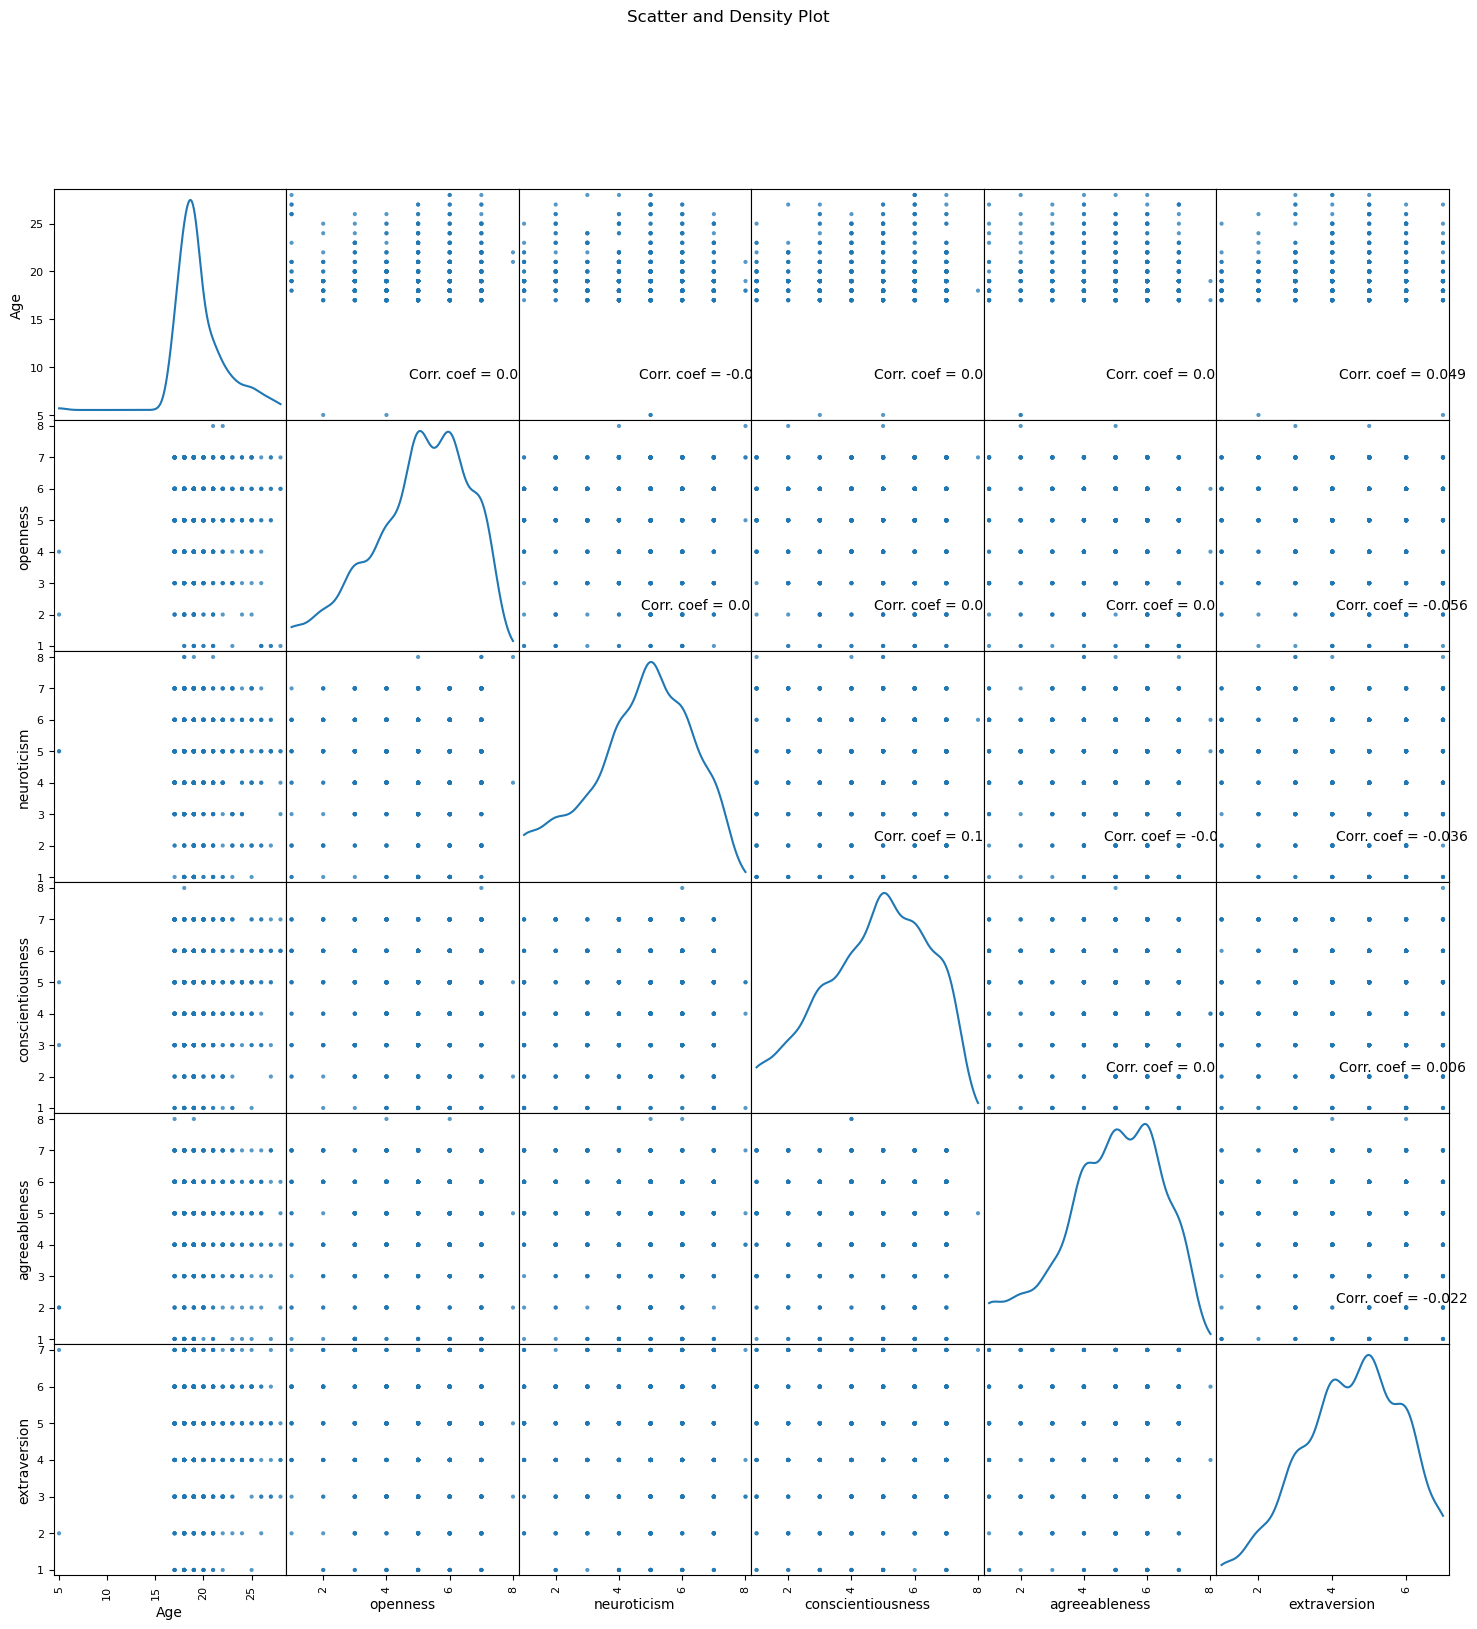

In [31]:
plotScatterMatrix(df3, 18, 10)

In [32]:
df2.head(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
5,Female,19,6,4,7,5,5,serious
6,Female,24,1,2,7,4,6,extraverted
7,Male,27,4,5,7,4,4,serious
8,Male,20,6,4,5,6,6,serious
9,Male,21,5,4,4,6,4,serious


In [33]:
df2.tail(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
481,Male,21,6,4,7,5,5,serious
482,Male,18,4,6,3,6,5,serious
483,Male,17,5,4,5,8,1,lively
484,Female,17,5,4,6,7,5,extraverted
485,Female,21,5,5,7,6,4,serious
486,Male,20,7,5,5,4,5,serious
487,Male,18,6,3,6,6,6,serious
488,Female,19,3,5,3,5,5,extraverted
489,Female,23,6,6,6,4,6,responsible
490,Male,18,8,3,6,7,6,serious


In [34]:
df3.head(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively
5,Male,18,5,7,7,6,4,lively
6,Female,17,5,6,5,7,4,extraverted
7,Female,19,6,6,7,5,4,extraverted
8,Male,18,5,7,5,6,7,dependable
9,Female,19,5,5,7,4,5,lively


In [35]:
df3.tail(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
548,Male,18,1,6,6,7,5,responsible
549,Female,20,7,7,5,7,3,dependable
550,Female,21,7,3,7,7,3,dependable
551,Female,18,6,5,4,5,5,serious
552,Male,23,3,5,5,4,2,responsible
553,Female,25,6,7,6,6,6,extraverted
554,Female,18,7,5,6,6,4,lively
555,Female,20,5,5,5,6,2,extraverted
556,Male,23,6,5,7,6,4,dependable
557,Male,21,5,6,5,5,3,serious


In [36]:

df = pd.concat([df2, df3])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label),Personality (Class label)
0,Female,20,7,9,9,5,5,dependable,NaN
1,Male,17,5,4,5,2,4,serious,NaN
2,Female,25,5,5,7,2,4,serious,NaN
3,Female,18,6,2,7,4,7,serious,NaN
4,Female,19,2,4,7,1,3,responsible,NaN


In [37]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label),Personality (Class label)
0,Female,20,7,9,9,5,5,dependable,NaN
1,Male,17,5,4,5,2,4,serious,NaN
2,Female,25,5,5,7,2,4,serious,NaN
3,Female,18,6,2,7,4,7,serious,NaN
4,Female,19,2,4,7,1,3,responsible,NaN
...,...,...,...,...,...,...,...,...,...
594,Male,21,8,8,5,5,3,NaN,serious
595,Female,21,6,5,4,7,2,NaN,responsible
596,Female,18,6,4,4,6,5,NaN,lively
597,Female,22,7,5,7,6,1,NaN,serious


In [38]:
df=df.drop("Personality (Class label)",axis=1)

In [39]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
594,Male,21,8,8,5,5,3,NaN
595,Female,21,6,5,4,7,2,NaN
596,Female,18,6,4,4,6,5,NaN
597,Female,22,7,5,7,6,1,NaN


In [40]:
df.head(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
5,Female,19,6,4,7,5,5,serious
6,Female,24,1,2,7,4,6,extraverted
7,Male,27,4,5,7,4,4,serious
8,Male,20,6,4,5,6,6,serious
9,Male,21,5,4,4,6,4,serious


In [41]:
df.tail(50)

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
548,Male,18,1,6,6,7,5,NaN
549,Female,20,7,7,5,7,3,NaN
550,Female,21,7,3,7,7,3,NaN
551,Female,18,6,5,4,5,5,NaN
552,Male,23,3,5,5,4,2,NaN
553,Female,25,6,7,6,6,6,NaN
554,Female,18,7,5,6,6,4,NaN
555,Female,20,5,5,5,6,2,NaN
556,Male,23,6,5,7,6,4,NaN
557,Male,21,5,6,5,5,3,NaN


In [42]:
df.isnull().sum()

Gender                         0
Age                            0
openness                       0
neuroticism                    0
conscientiousness              0
agreeableness                  0
extraversion                   0
Personality (class label)    594
dtype: int64

In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

In [45]:
df.duplicated().sum()

216

In [46]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,Female,20,7,9,9,5,5,dependable
1,Male,17,5,4,5,2,4,serious
2,Female,25,5,5,7,2,4,serious
3,Female,18,6,2,7,4,7,serious
4,Female,19,2,4,7,1,3,responsible
...,...,...,...,...,...,...,...,...
526,Female,20,5,6,2,2,3,extraverted
527,Male,18,6,5,5,5,7,serious
528,Male,19,1,5,4,7,6,serious
529,Female,22,3,3,2,6,4,responsible


In [47]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})

df['Personality (class label)'] = df['Personality (class label)'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 2,
                                           'responsible': 3,
                                           'serious': 4})

In [48]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,1,20,7,9,9,5,5,0
1,0,17,5,4,5,2,4,4
2,1,25,5,5,7,2,4,4
3,1,18,6,2,7,4,7,4
4,1,19,2,4,7,1,3,3
...,...,...,...,...,...,...,...,...
526,1,20,5,6,2,2,3,1
527,0,18,6,5,5,5,7,4
528,0,19,1,5,4,7,6,4
529,1,22,3,3,2,6,4,3


In [49]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

In [50]:
df.dropna(inplace=True)

In [51]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,1,20,7,9,9,5,5,0
1,0,17,5,4,5,2,4,4
2,1,25,5,5,7,2,4,4
3,1,18,6,2,7,4,7,4
4,1,19,2,4,7,1,3,3
...,...,...,...,...,...,...,...,...
526,1,20,5,6,2,2,3,1
527,0,18,6,5,5,5,7,4
528,0,19,1,5,4,7,6,4
529,1,22,3,3,2,6,4,3


In [52]:
df.isnull().sum()

Gender                       0
Age                          0
openness                     0
neuroticism                  0
conscientiousness            0
agreeableness                0
extraversion                 0
Personality (class label)    0
dtype: int64

In [53]:
df.duplicated().sum()

216

In [54]:
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
0,1,20,7,9,9,5,5,0
1,0,17,5,4,5,2,4,4
2,1,25,5,5,7,2,4,4
3,1,18,6,2,7,4,7,4
4,1,19,2,4,7,1,3,3
...,...,...,...,...,...,...,...,...
526,1,20,5,6,2,2,3,1
527,0,18,6,5,5,5,7,4
528,0,19,1,5,4,7,6,4
529,1,22,3,3,2,6,4,3


In [55]:
df.corr()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
Gender,1.000000,-0.032009,-0.020759,0.067200,-0.107101,-0.064120,-0.018317,-0.365932
Age,-0.032009,1.000000,-0.100549,-0.003814,-0.055935,-0.042356,0.024346,0.032491
openness,-0.020759,-0.100549,1.000000,-0.019562,0.032262,-0.078280,-0.092876,-0.165274
neuroticism,0.067200,-0.003814,-0.019562,1.000000,0.061057,-0.190076,0.025286,-0.357211
conscientiousness,-0.107101,-0.055935,0.032262,0.061057,1.000000,-0.014121,-0.114849,0.154697
agreeableness,-0.064120,-0.042356,-0.078280,-0.190076,-0.014121,1.000000,0.079296,0.075463
extraversion,-0.018317,0.024346,-0.092876,0.025286,-0.114849,0.079296,1.000000,0.237400
Personality (class label),-0.365932,0.032491,-0.165274,-0.357211,0.154697,0.075463,0.237400,1.000000


In [56]:
df.describe()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (class label)
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.00000,531.000000,531.000000
mean,0.463277,20.122411,4.860640,4.917137,4.838041,4.94162,4.894539,2.619586
std,0.499120,2.493404,1.587503,1.709217,1.805689,1.62944,1.456342,1.460910
min,0.000000,5.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
25%,0.000000,18.000000,4.000000,4.000000,3.000000,4.00000,4.000000,1.000000
50%,0.000000,19.000000,5.000000,5.000000,5.000000,5.00000,5.000000,3.000000
75%,1.000000,22.000000,6.000000,6.000000,6.000000,6.00000,6.000000,4.000000
max,1.000000,28.000000,8.000000,9.000000,9.000000,8.00000,8.000000,4.000000


<Axes: >

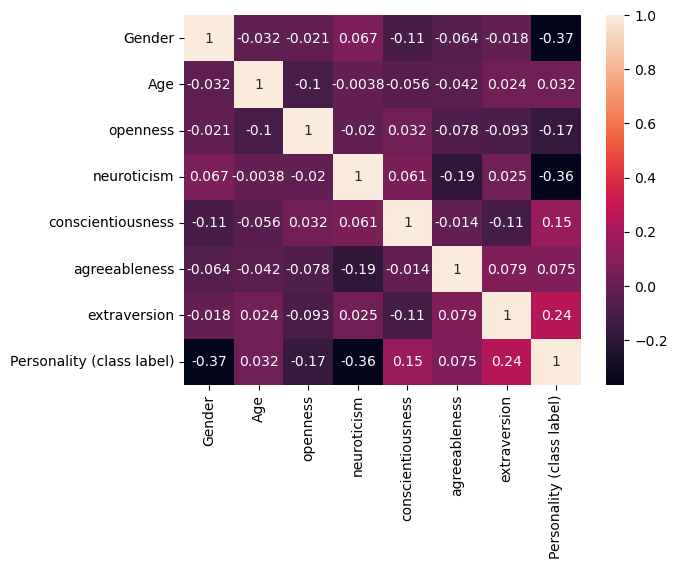

In [57]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [58]:
df.skew()

Gender                       0.147708
Age                          0.319610
openness                    -0.548252
neuroticism                 -0.453174
conscientiousness           -0.470988
agreeableness               -0.438839
extraversion                -0.411878
Personality (class label)   -0.388657
dtype: float64

In [59]:
X=df.drop('Personality (class label)',axis=1)
y=df['Personality (class label)']

In [60]:
X

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,1,20,7,9,9,5,5
1,0,17,5,4,5,2,4
2,1,25,5,5,7,2,4
3,1,18,6,2,7,4,7
4,1,19,2,4,7,1,3
...,...,...,...,...,...,...,...
526,1,20,5,6,2,2,3
527,0,18,6,5,5,5,7
528,0,19,1,5,4,7,6
529,1,22,3,3,2,6,4


In [61]:
y

0      0
1      4
2      4
3      4
4      3
      ..
526    1
527    4
528    4
529    3
530    1
Name: Personality (class label), Length: 531, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [63]:
X_train

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
53,0,24,4,5,5,6,2
37,0,20,2,2,4,7,5
375,0,19,6,5,6,7,5
384,0,19,1,5,4,7,6
388,0,21,4,4,1,6,4
...,...,...,...,...,...,...,...
234,1,17,6,7,4,4,5
503,1,19,6,6,5,4,4
86,1,23,2,2,6,4,6
151,0,20,6,1,6,4,4


In [64]:
y_train

53     2
37     4
375    4
384    4
388    4
      ..
234    1
503    0
86     4
151    2
525    1
Name: Personality (class label), Length: 424, dtype: int64

In [65]:
rfc1=RandomForestClassifier(n_estimators=1000)
rfc1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [66]:
predictions_rfc1=rfc1.predict(X_test)

In [67]:
rf_recovery = accuracy_score(y_test,predictions_rfc1)
rf_recovery

0.8317757009345794

In [68]:
print(confusion_matrix(y_test,predictions_rfc1))
print('\n')
print(classification_report(y_test,predictions_rfc1))

[[ 5  1  0  0  2]
 [ 0 25  1  0  3]
 [ 0  0  8  0  1]
 [ 0  2  1  8  6]
 [ 0  1  0  0 43]]


              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.86      0.86      0.86        29
           2       0.80      0.89      0.84         9
           3       1.00      0.47      0.64        17
           4       0.78      0.98      0.87        44

    accuracy                           0.83       107
   macro avg       0.89      0.76      0.80       107
weighted avg       0.86      0.83      0.82       107



In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [70]:
logistic_model = LogisticRegression(random_state = 0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [71]:
y_predict =logistic_model.predict(X_test)

<Axes: >

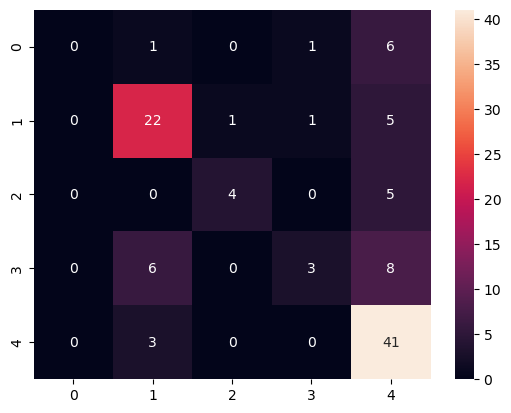

In [72]:
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm ,annot=True)

In [73]:
print("accuracy :" , logistic_model.score(X_test,y_test))

accuracy : 0.6542056074766355


In [74]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.69      0.76      0.72        29
           2       0.80      0.44      0.57         9
           3       0.60      0.18      0.27        17
           4       0.63      0.93      0.75        44

    accuracy                           0.65       107
   macro avg       0.54      0.46      0.46       107
weighted avg       0.61      0.65      0.60       107



In [75]:

from sklearn.neighbors import KNeighborsClassifier


In [76]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("accuracy :" , knn_model.score(X_test,y_test))

accuracy : 0.7102803738317757


In [77]:
cmt = confusion_matrix(y_test,y_pred)

<Axes: >

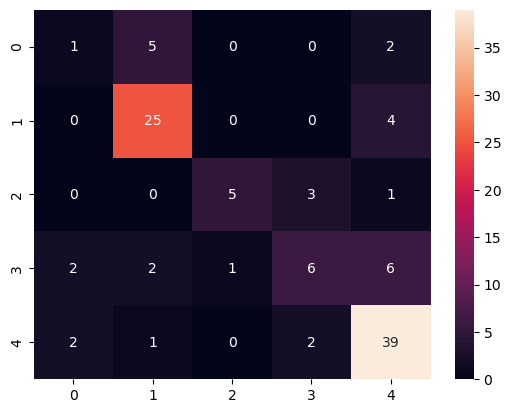

In [78]:
sns.heatmap(cmt ,annot=True)

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.76      0.86      0.81        29
           2       0.83      0.56      0.67         9
           3       0.55      0.35      0.43        17
           4       0.75      0.89      0.81        44

    accuracy                           0.71       107
   macro avg       0.62      0.56      0.57       107
weighted avg       0.69      0.71      0.69       107



In [80]:
from sklearn.svm import SVC

In [81]:
su=SVC()

In [82]:
su.fit(X_train, y_train)
y_pred = su.predict(X_test)
print("accuracy :" , knn_model.score(X_test,y_test))

accuracy : 0.7102803738317757


In [83]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5981308411214953
